In [1]:
# 판다스, 넘파이 불러오기
import pandas as pd
import numpy as np

# matplotlib, seaborn 불러오기
import matplotlib.pyplot as plt 
import seaborn as sns

# warning message 무시 (알 필요 없음)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 실습용 데이터 불러오기
# 불러올 데이터는 붓꽃에 대한 데이터, 붓꽃 종류별 꽃잎 각 부분의 길이와 너비를 변수로 갖는다.
# 알 필요 없음
from sklearn.datasets import load_iris
iris = load_iris()

# 불러온 실습용 데이터를 데이터프레임으로 만들어줌
# pd.DataFrame() 함수: 데이터프레임을 만드는 함수
# 나머지는 알 필요 없음
data = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                    columns = iris['feature_names'] + ['target'])
data['target'] = data['target'].map({0: 'setosa', 1: 'versicolor', 2:'verginica'})

In [4]:
# 데이터가 잘 불러져 왔는지 확인
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Matplotlib 실습

<img src = 'https://matplotlib.org/stable/_images/anatomy.png' width = '500' height = '500'>

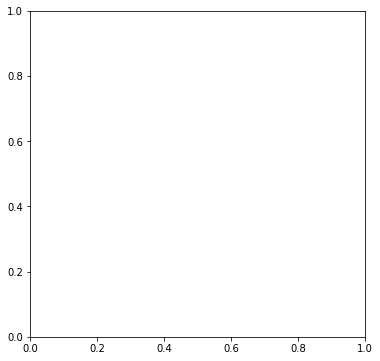

In [6]:
# 6x6 크기의 도화지를 만든다.
# fig: 전체 도화지의 이름
# ax: 도화지 내부의 네모칸 이름
fig, ax = plt.subplots(figsize = (6, 6))

<BarContainer object of 150 artists>

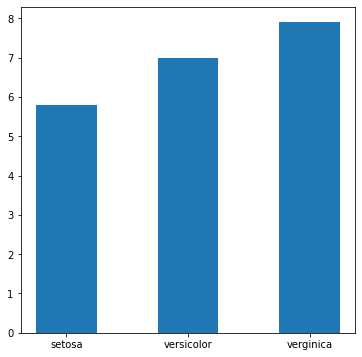

In [12]:
# 도화지를 만들고 그림을 그려본다.
fig, ax = plt.subplots(figsize = (6, 6))

# barplot 
# 꽃 종류별 sepal length의 평균
plt.bar(data['target'], data['sepal length (cm)'], width = 0.5)

(array([32., 41., 42., 24., 11.]),
 array([4.3 , 5.02, 5.74, 6.46, 7.18, 7.9 ]),
 <a list of 5 Patch objects>)

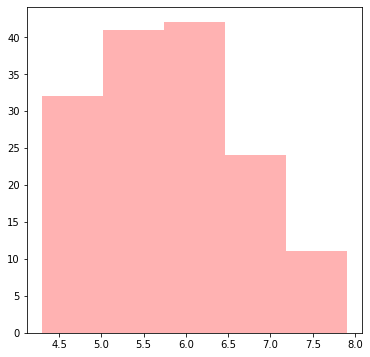

In [16]:
# 도화지를 만들고 그림을 그려본다.
fig, ax = plt.subplots(figsize = (6, 6))

# 히스토그램
# bins: x축의 빈도
# alpha: 플랏의 투명도
plt.hist(data['sepal length (cm)'], bins = 5, alpha = 0.3, color = 'r')

Text(0, 0.5, 'petal length')

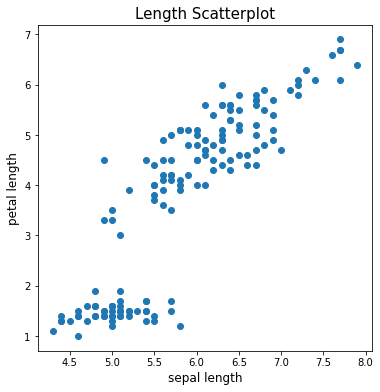

In [ ]:
# 도화지를 만들고 그림을 그려본다.
fig, ax = plt.subplots(figsize = (6, 6))

# scatterplot
plt.scatter(data['sepal length (cm)'], 
            data['petal length (cm)'])

# 플랏의 제목 추가
plt.title('Length Scatterplot', fontsize = 15)

# 축 이름 추가
plt.xlabel('sepal length', fontsize = 12)
plt.ylabel('petal length', fontsize = 12)

# 이를 통해 선형관계를 파악할 수 있음 (sepal length가 클수록 petal length도 큰 경향)

# Seaborn 실습

In [21]:
# 굳이 plot을 그리지 않아도 알 수 있음
data['target'].value_counts()

versicolor    50
setosa        50
verginica     50
Name: target, dtype: int64

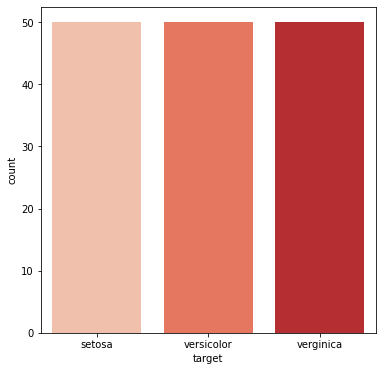

In [20]:
# matplotlib과 같이 도화지를 만들어줌
fig, ax = plt.subplots(figsize = (6, 6))

# countplot (항목의 갯수를 세어주는 차트)
sns.countplot(x = data['target'], palette = 'Reds')

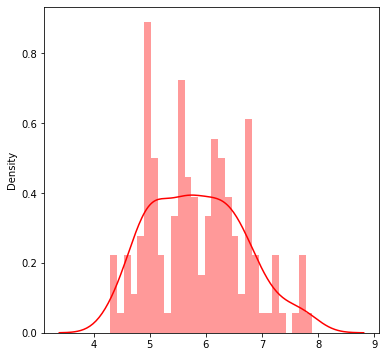

In [ ]:
# matplotlib과 같이 도화지를 만들어줌
fig, ax = plt.subplots(figsize = (6, 6))

# distplot (해당 변수의 빈도와 분포를 확인)
sns.distplot(x = data['sepal length (cm)'], bins = 30, color = 'r')

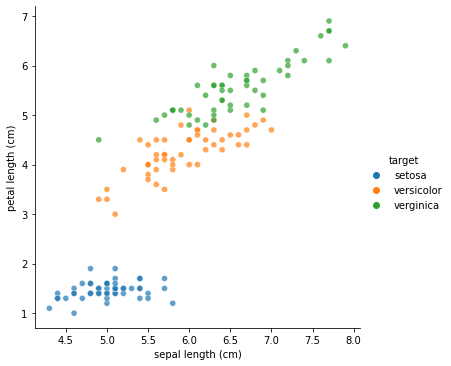

In [23]:
# relplot (seaborn의 scatterplot)
# hue : 구분하기 위해 범주형 변수를 설정
sns.relplot(x = data['sepal length (cm)'], y = data['petal length (cm)'], hue = data['target'], alpha = 0.7)

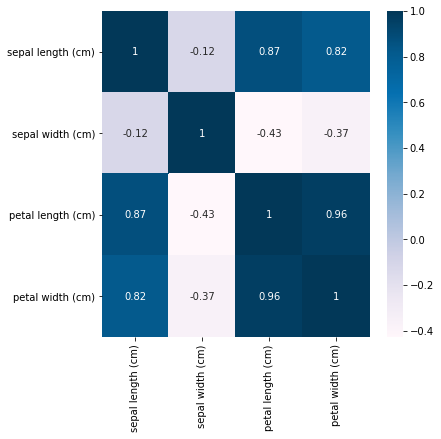

In [27]:
# matplotlib과 같이 도화지를 만들어줌
fig, ax = plt.subplots(figsize = (6, 6))

# Heatmap (변수별 상관관계파악을 위함)
# 연속형(숫자형) 변수만 파악할 수 있기 때문에 꽃의 종류 변수는 제외
# 데이터의 상관관계를 확인하는 법 : 데이터.corr()
sns.heatmap(data.drop(['target'], axis = 1).corr(), annot = True, cmap = plt.cm.PuBu)

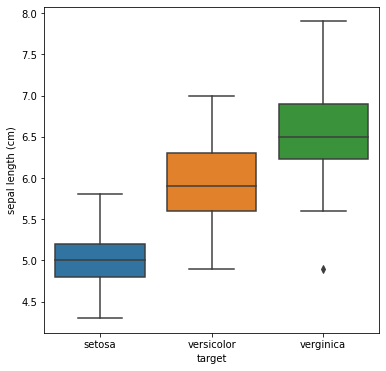

In [ ]:
# matplotlib과 같이 도화지를 만들어줌
fig, ax = plt.subplots(figsize = (6, 6))

# Boxplot
# 이를 통해 verginica의 sepal length가 가장 긴편임을 알 수 있음
# 또한 verginica에 이상치로 보이는 데이터도 확인
sns.boxplot(x = data['target'], y = data['sepal length (cm)'])

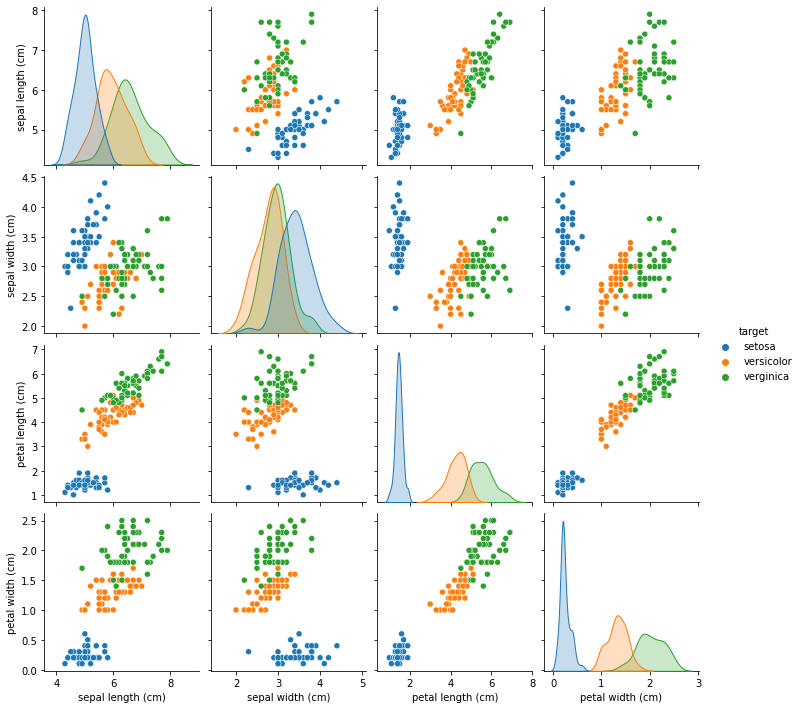

In [ ]:
# pairplot(각 변수들의 관계를 한번에 파악)
# hue : 구분하기 위해 범주형 변수를 설정
sns.pairplot(data, hue = 'target')